Book 1  
Chapter 15 Basic Computations in NumPy
### 习题答案

In [3]:
import numpy as np
import matplotlib.pyplot as plt

##### Q1. 给定如下一元高斯函数，参数 a = 1, b = 2, c = 1。请用 `NumPy` 和 `Matplotlib` 线图可视化函数函数图像。
$${\displaystyle f(x) = a \exp \left(-{\frac{(x-b)^{2}}{2c^{2}}}\right)}$$

In [5]:
a = 1
b = 2
c = 1
x_array = np.linspace(-6, 6, 121)
f_x_array = a * np.exp(-((x_array - b)**2) / (2 * c**2))

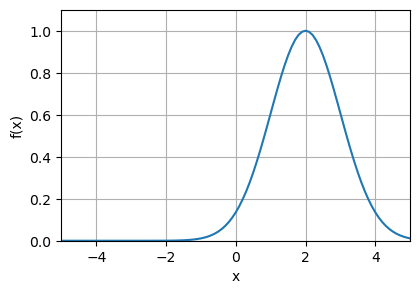

In [6]:
fig, ax = plt.subplots(figsize=(4.5, 3))

ax.plot(x_array, f_x_array)

ax.set_xlim(-5, 5)
ax.set_ylim(0, f_x_array.max()+0.1)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid()

##### Q2. 给定如下二元高斯函数。请用 `NumPy` 和 `Matplotlib` 三维网格面可视化二元函数图像。
$${\displaystyle f(x_1, x_2) = \exp \left(-x_1^2 - x_2^2 \right)}$$

In [8]:
x1_array = np.linspace(-3, 3, 301)
x2_array = np.linspace(-3, 3, 301)
xx1, xx2 = np.meshgrid(x1_array, x2_array)
ff = np.exp(-xx1**2 - xx2**2)

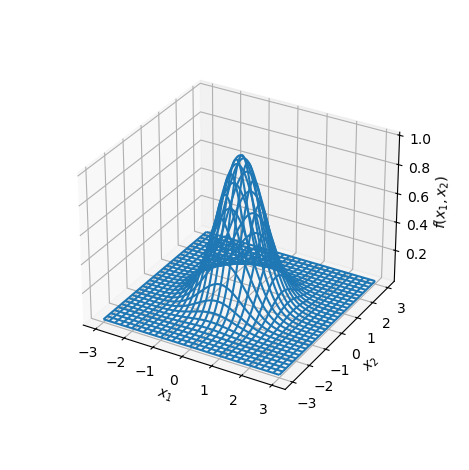

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# 绘制二元函数网格曲面
ax.plot_wireframe(xx1, xx2, ff, rstride=10, cstride=10)

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$f(x_1, x_2)$')
plt.tight_layout()
ax.set_box_aspect(aspect=None, zoom=0.8)

##### Q3. 下式为二元高斯分布的概率密度函数，请用 `NumPy` 和 `Matplotlib` 填充等高线可视化这个二元函数图像。参数具体为 $µ_X = 0$, $µ_Y = 0$, $σ_X = 1$, $σ_Y = 1$, $ρ_{X, Y} = 0.6$。
$${\displaystyle f(x, y) = {\frac{1}{2\pi \sigma_{X}\sigma_{Y}{\sqrt{1 - \rho^{2}}}}} \exp \left(-{\frac{1}{2(1-\rho^{2})}}\left[\left({\frac{x - \mu_{X}}{\sigma_{X}}}\right)^{2} - 2\rho \left({\frac{x - \mu_{X}}{\sigma_{X}}}\right)\left({\frac{y - \mu_{Y}}{\sigma_{Y}}}\right) + \left({\frac{y-\mu_{Y}}{\sigma_{Y}}}\right)^{2}\right]\right)}$$

In [11]:
sigma_X = 1
sigma_Y = 1
rho_XY  = 0.6
mu_X    = 0
mu_Y    = 0

In [12]:
def f_XY_PDF(xx1, xx2, sigma_X, sigma_Y, rho_XY, mu_X, mu_Y):
    coeff = 2 * np.pi * sigma_X * sigma_Y * np.sqrt(1 - rho_XY**2)
    coeff = 1 / coeff

    xx1_ = (xx1 - mu_X) / sigma_X
    xx2_ = (xx2 - mu_Y) / sigma_Y

    ellipse = 1 / (1 - rho_XY**2) * (xx1_**2 - 2*rho_XY*xx1_*xx2_ + xx2_**2)

    return coeff * np.exp(-1/2 * ellipse)

In [13]:
PDF_ff = f_XY_PDF(xx1, xx2, sigma_X, sigma_Y, rho_XY, mu_X, mu_Y)

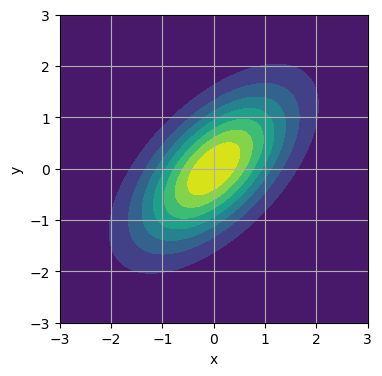

In [14]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.contourf(xx1, xx2, PDF_ff)

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.grid()
ax.set_aspect('equal', adjustable='box')